In [98]:
import numpy as np
import cvxpy as cp

# Given data
A = np.array([[1, 1], [0, 0.95]])
b = np.array([0, 0.1])
x0 = np.array([0, 0])
xdes = np.array([10, 0])
N = 20

# Define decision variables
u = cp.Variable(N)
x = cp.Variable((N+1, 2))  # State variables x(t) for t = 0, ..., N-1

# Define the cost function
F = cp.sum(cp.abs(u) + (2 * cp.abs(u) - 1))

# Define the constraints
constraints = [x[0] == x0]
for t in range(N):
    constraints.append(x[t+1] == A @ x[t] + b * u[t])
    
constraints.append(x[N] == xdes)

# Create the LP problem
problem = cp.Problem(cp.Minimize(F), constraints )

# Solve the problem
result = problem.solve(solver=cp.ECOS)

u_opt = u.value

print("Optimal fuel consumption:", result)
print("Optimal Control Input:")
print(u_opt)


Optimal fuel consumption: 13.18143993589981
Optimal Control Input:
[ 8.03023999e+00  9.98637603e-10  5.61942844e-11  8.45516007e-11
  8.77976992e-11  7.90741431e-11  6.85315429e-11  5.82768563e-11
  4.82525392e-11  3.81124103e-11  2.76709618e-11  1.69746565e-11
  6.27813606e-12 -4.02911901e-12 -1.34742286e-11 -2.16821436e-11
 -3.00499090e-11 -5.31598270e-11 -2.65999629e-10 -3.03023999e+00]


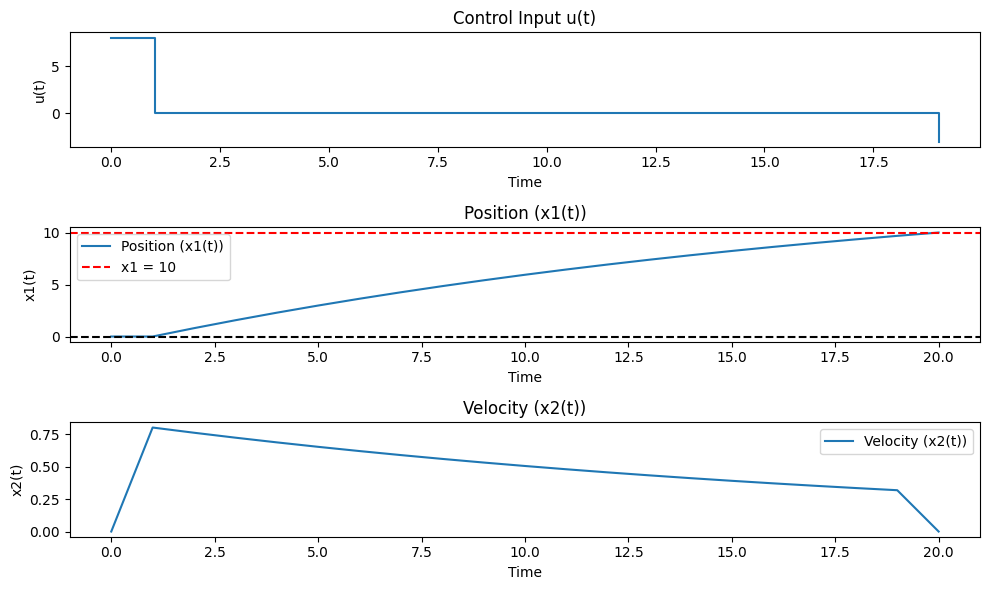

In [99]:
import matplotlib.pyplot as plt

x_opt = np.zeros((N+1, 2))
x_opt[0] = x0
for t in range(1, N):
    x_opt[t] = A @ x_opt[t - 1] + b * u_opt[t - 1]
x_opt[N] = xdes  # Set the state at time N to the desired state

# Plot the input signal u(t)
t = np.arange(N)
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.step(t, u_opt, where='post')
plt.title('Control Input u(t)')
plt.xlabel('Time')
plt.ylabel('u(t)')

# Plot position x1(t)
t = np.arange(N+1)
plt.subplot(3, 1, 2)
plt.plot(t, x_opt[:, 0], label='Position (x1(t))')
plt.axhline(y=10, color='r', linestyle='--', label='x1 = 10')
plt.axhline(color='k', linestyle='--')
plt.title('Position (x1(t))')
plt.xlabel('Time')
plt.ylabel('x1(t)')
plt.legend()

# Plot velocity x2(t)
plt.subplot(3, 1, 3)
plt.plot(t, x_opt[:, 1], label='Velocity (x2(t))')
plt.title('Velocity (x2(t))')
plt.xlabel('Time')
plt.ylabel('x2(t)')
plt.legend()

plt.tight_layout()
plt.show()


In [105]:
import cvxpy as cp
import numpy as np

# Define problem data
A = np.array([[1, 1], [0, 0.95]])
b = np.array([0, 0.1])
x0 = np.array([0, 0])
xdes = np.array([10, 0])
N = 20

# Define decision variables
u = cp.Variable(N)
t = cp.Variable(N)

# Define the objective
objective = cp.Minimize(cp.sum(t))

# Define the constraints
constraints = [
    xdes == cp.sum([np.linalg.matrix_power(A,t) @ b * u[N-1-t] for t in range(N)]),
    u >= -t, 
    u <= t, 
    u >= -(t + 1) / 2, 
    u <= (t + 1) / 2,
]

# Create the optimization problem
prob = cp.Problem(objective, constraints)

# Solve the problem
result = prob.solve(solver=cp.ECOS)

# Print the optimal solution
print("Optimal fuel consumption:", result)
print("Optimal control input u(t):")
print(u.value)

Optimal fuel consumption: 15.911948842270723
Optimal control input u(t):
[ 3.22798721e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  9.99999998e-01  6.44106961e-09
  2.61699104e-09  1.81043852e-09  1.14644301e-09  5.04105537e-10
 -1.50414844e-10 -8.95742605e-10 -1.92770382e-09 -4.74158404e-09
 -9.99999996e-01 -1.00000000e+00 -1.00000000e+00 -1.22798722e+00]
